In [36]:
import pandas as pd
import numpy as np

file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/MS/Account Products.xlsx'
df = pd.read_excel(file_path, sheet_name='google_trends')

display(df.head(5))

,Date,Abanca,Santander,Sabadell,BBVA,Bankinter,CaixaBank,EVO Banco,N26,Openbank
0,2021-12-05,6,58,28,41,11,7,2,1,4
1,2021-12-12,8,71,38,49,13,7,3,1,4
2,2021-12-19,8,65,33,47,12,6,3,1,4
3,2021-12-26,9,68,36,47,12,6,3,1,5
4,2022-01-02,8,61,31,46,11,6,3,1,5


In [28]:
google_df = df.copy()
google_df['Date'] = pd.to_datetime(google_df['Date'])

# Set 'Date' as index
google_df.set_index('Date', inplace=True)

# Resample to monthly frequency and aggregate data
monthly_google_df = google_df.resample('M').sum()  # Use sum, mean, or other aggregation function

# Reset index to have 'Month' as a column
monthly_google_df.reset_index(inplace=True)

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_33340\3032081571.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_google_df = google_df.resample('M').sum()  # Use sum, mean, or other aggregation function


In [29]:
monthly_google_df= monthly_google_df.reset_index(drop=True)
# Melting the DataFrame
long_monthly_google_df = monthly_google_df.melt(id_vars=['Date'], var_name='bank name', value_name='google trend')

long_monthly_google_df['Date'] = pd.to_datetime(long_monthly_google_df['Date'])
long_monthly_google_df.set_index('Date', inplace=True)

long_monthly_google_df.head(3)

,bank name,google trend
Date,,
2021-12-31,Abanca,31
2022-01-31,Abanca,39
2022-02-28,Abanca,29


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

def decompose_and_analyze_seasonality(group, target_column = 'Rank', model_type = 'additive'):
    # Check for sufficient data points
    if group[target_column].dropna().shape[0] < 2:
        print(f"Not enough data to decompose for {group.name}")
        return group

    # Handle missing values appropriately
    #group[target_column] = group[target_column].fillna(method='ffill').fillna(method='bfill')
    
    
    # Ensure data frequency is set correctly to monthly
    if not pd.infer_freq(group.index):
        group = group.asfreq('M')

    # Perform seasonal decomposition
    try:
        # period of 12 for monthly data (yearly seasonality)
        result = seasonal_decompose(group[target_column], model=model_type, period=12)
        result.plot()
        plt.title(f"Decomposition for Bank: {group.name}")
        plt.tight_layout()
        plt.show()
        
        analyze_seasonal_component(result.seasonal, group.name)
        #analyze_error_component(result.resid, group.name)

        return result.seasonal
    except ValueError as e:
        print(f"Decomposition failed for {group.name} with error: {e}")


def analyze_seasonal_component(seasonal_series, name):
    # Group by month to see the average seasonal effect per month
    monthly_seasonal_effect = seasonal_series.groupby(seasonal_series.index.month).mean()
    monthly_seasonal_effect.plot(kind='bar')
    plt.title(f"Average Monthly Seasonal Effects for {name[0]}, {name[1]}")
    plt.xlabel('Month')
    plt.ylabel('Seasonal Effect')
    plt.show()
    
def analyze_error_component(residuals, name):
    if residuals.isnull().any():
        residuals = residuals.dropna()  # Ensure there are no NaNs

    # Plotting the ACF and PACF
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    
    plot_acf(residuals, lags=40, ax=ax1)
    ax1.set_title(f'Autocorrelation Function for {name[0]}, {name[1]}')

    plot_pacf(residuals, lags=40, ax=ax2)
    ax2.set_title(f'Partial Autocorrelation Function for {name[0]}, {name[1]}')
    
    plt.tight_layout()
    plt.show()

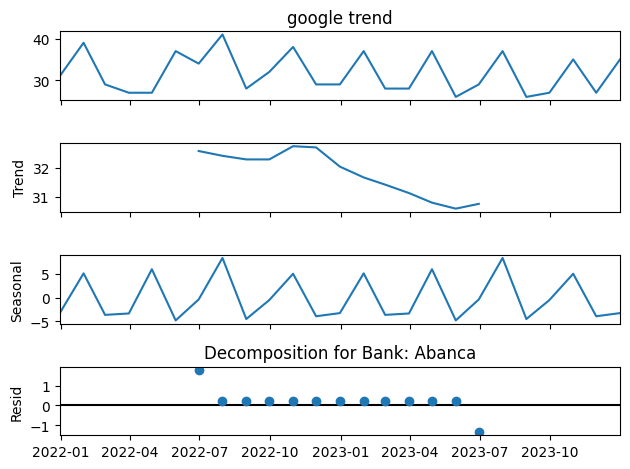

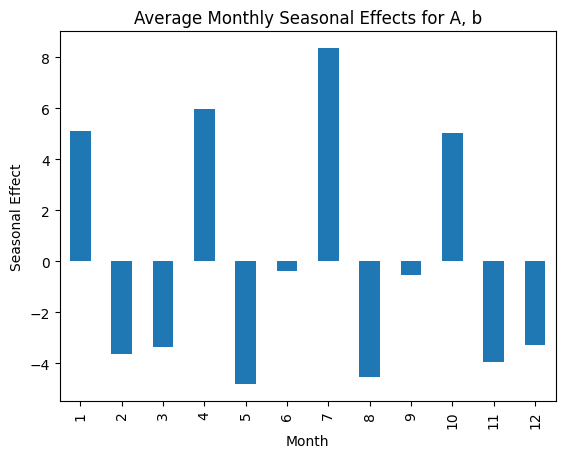

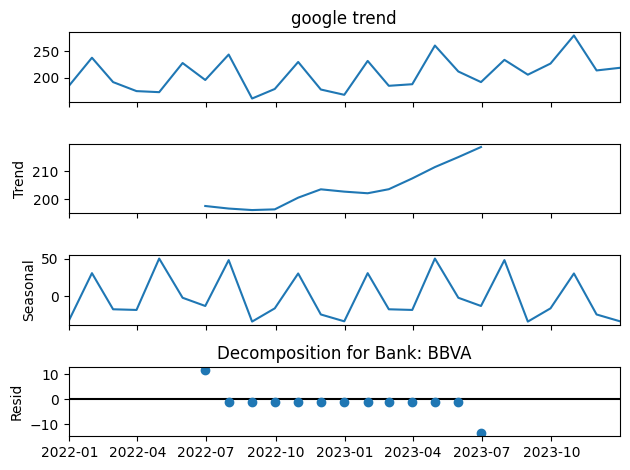

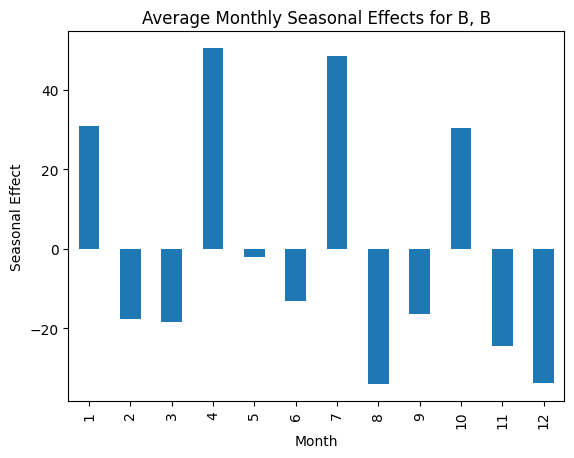

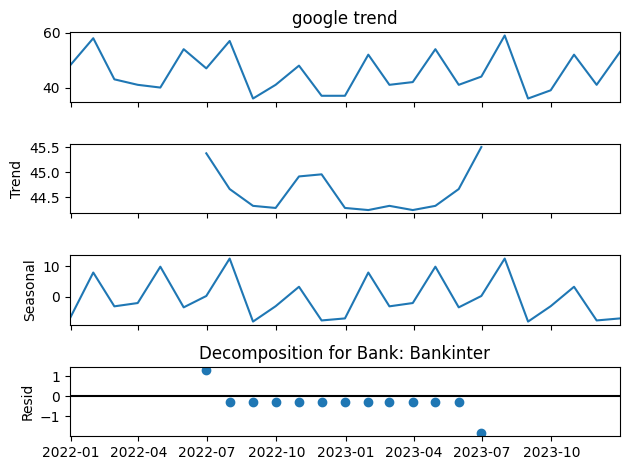

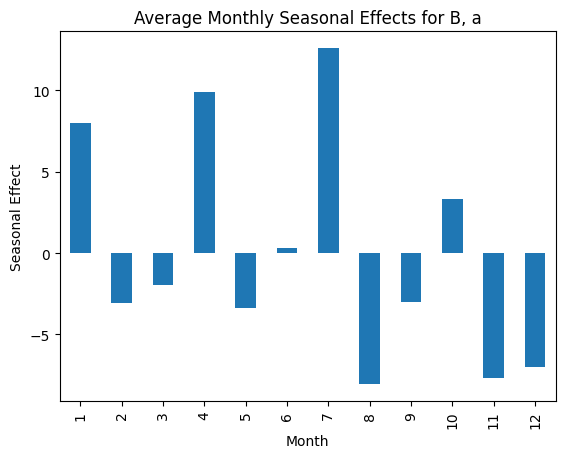

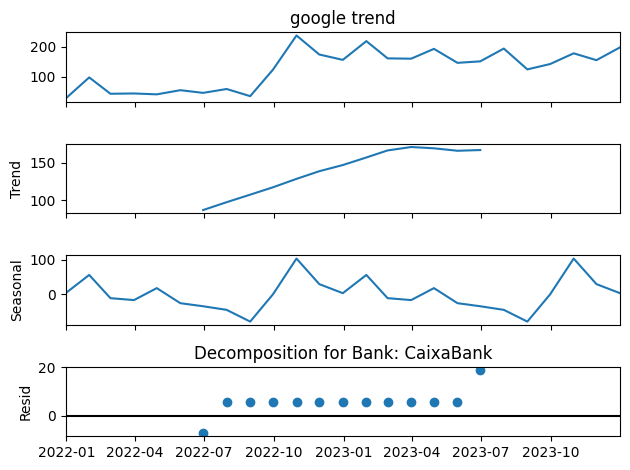

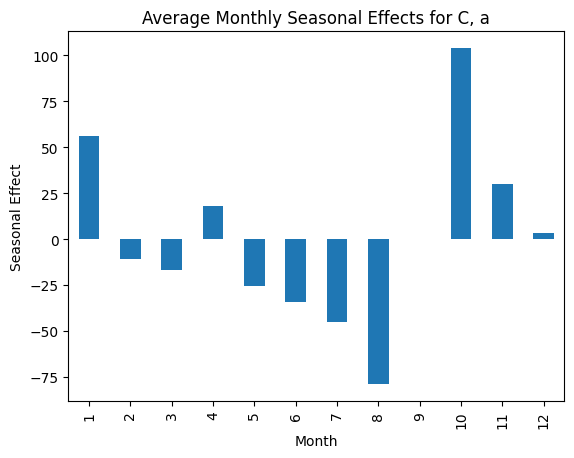

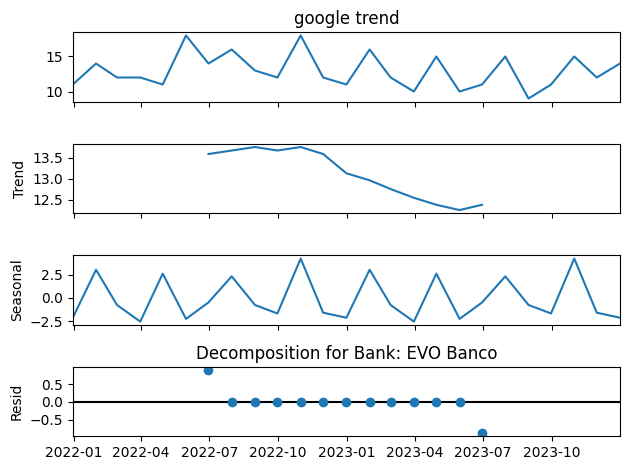

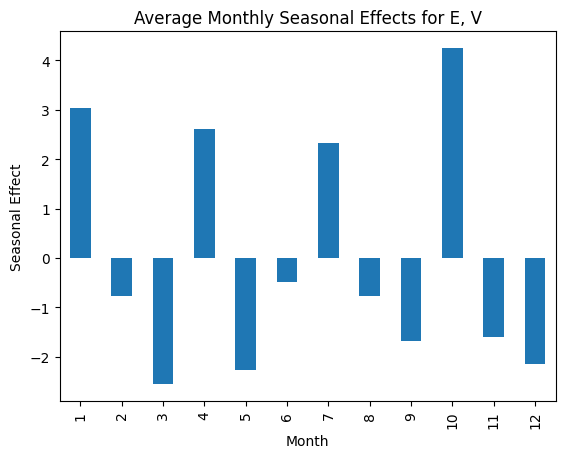

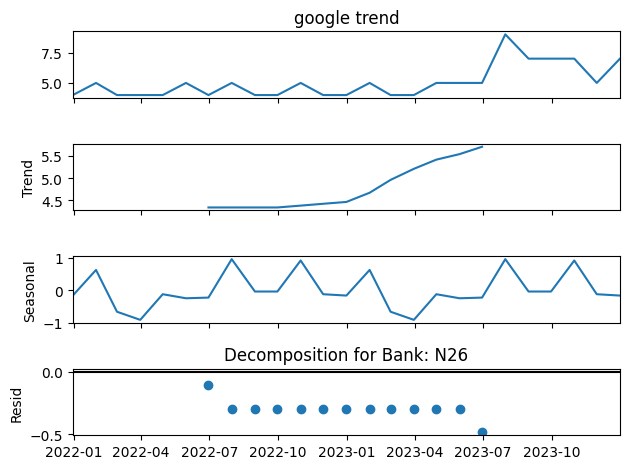

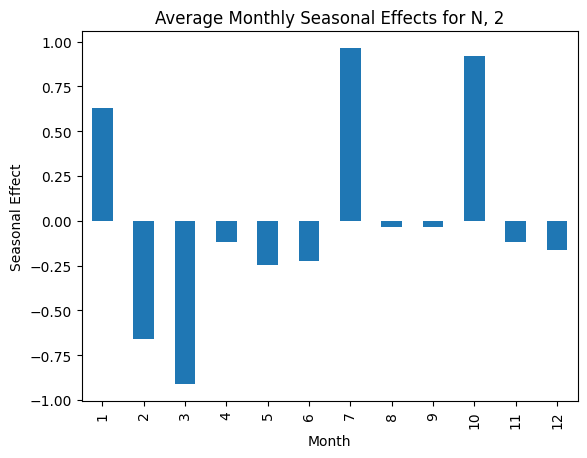

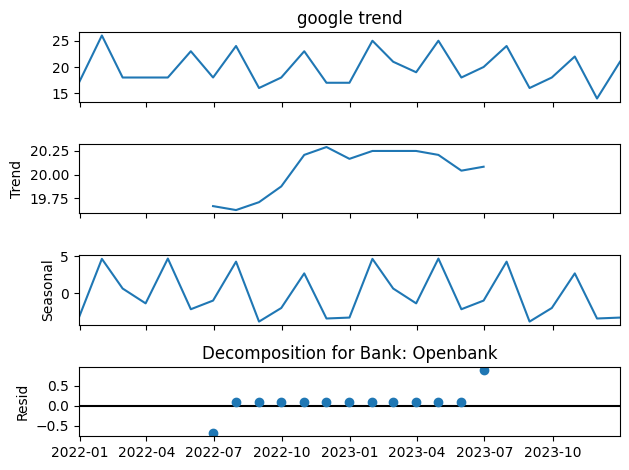

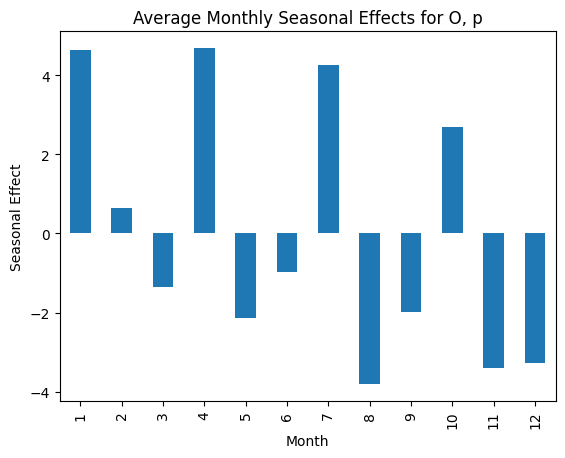

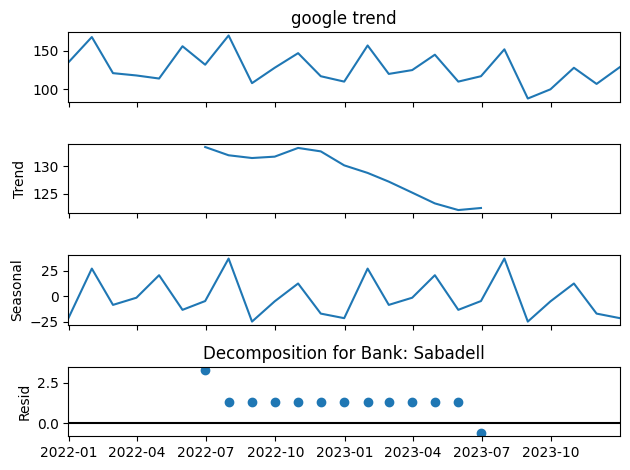

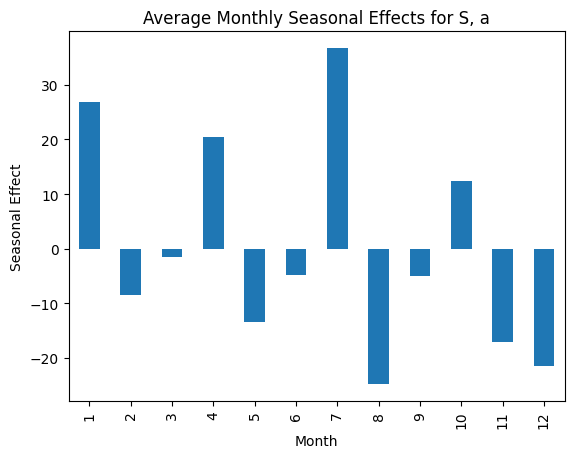

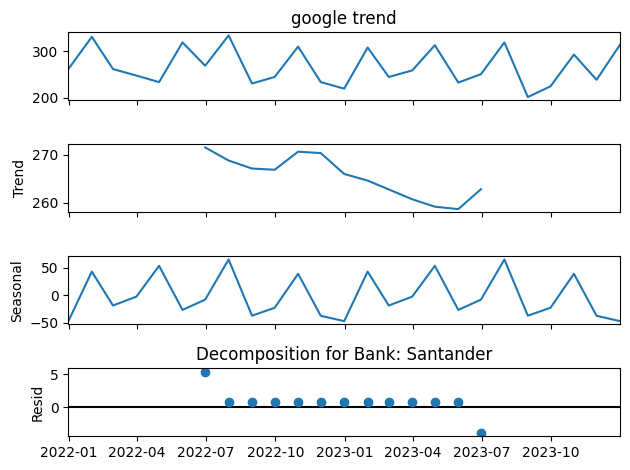

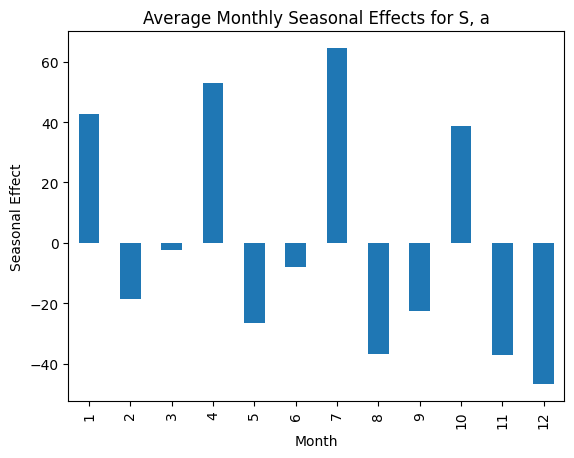

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_33340\4098118263.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_effects = long_monthly_google_df.groupby(['bank name']).apply(


In [31]:
seasonal_effects = long_monthly_google_df.groupby(['bank name']).apply(
    lambda group: decompose_and_analyze_seasonality(group, 'google trend', 'additive'))

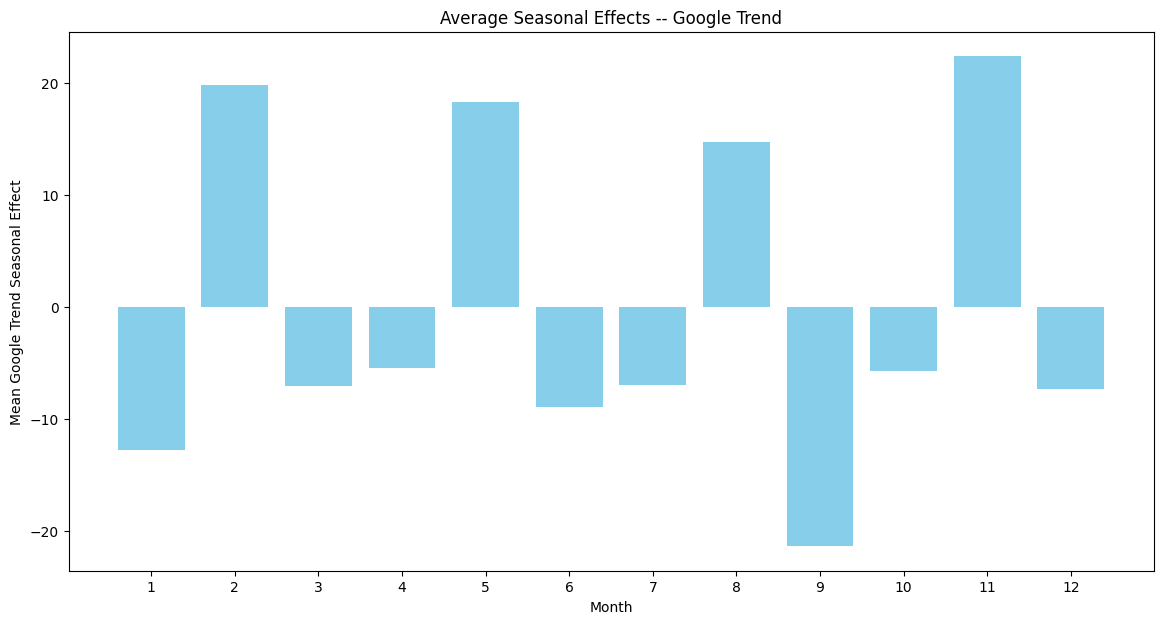

In [32]:
import matplotlib.pyplot as plt
import numpy as np

seasonal_effects = seasonal_effects.dropna()
monthly_mean_seasonal_effects = seasonal_effects.mean(axis=0)

# Limit to the first 12 months
monthly_mean_seasonal_effects = monthly_mean_seasonal_effects[:12]

# Plotting
plt.figure(figsize=(14, 7))  # Adjusting figure size for clarity
plt.bar(range(1, 13), monthly_mean_seasonal_effects.values, color='skyblue', width=0.8)

# Setting up the x-axis to show month numbers from 1 to 12
plt.xticks(np.arange(1, 13, step=1))

# Setting labels and title
plt.title('Average Seasonal Effects -- Google Trend')
plt.xlabel('Month')
plt.ylabel('Mean Google Trend Seasonal Effect')

# Show the plot
plt.show()


In [37]:
google_df = df.copy()
google_df['Date'] = pd.to_datetime(google_df['Date'])

# Set 'Date' as index
google_df.set_index('Date', inplace=True)

# Resample to monthly frequency and aggregate data
monthly_google_df = google_df.resample('M').mean()  # Use sum, mean, or other aggregation function

# Reset index to have 'Month' as a column
monthly_google_df.reset_index(inplace=True)

monthly_google_df= monthly_google_df.reset_index(drop=True)
# Melting the DataFrame
long_monthly_google_df = monthly_google_df.melt(id_vars=['Date'], var_name='bank name', value_name='google trend')

long_monthly_google_df['Date'] = pd.to_datetime(long_monthly_google_df['Date'])
long_monthly_google_df.set_index('Date', inplace=True)

long_monthly_google_df.head(3)

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_33340\2478774165.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_google_df = google_df.resample('M').mean()  # Use sum, mean, or other aggregation function


,bank name,google trend
Date,,
2021-12-31,Abanca,7.75
2022-01-31,Abanca,7.80
2022-02-28,Abanca,7.25


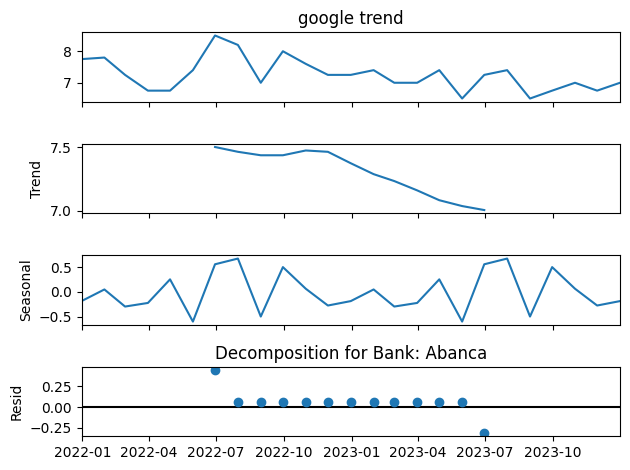

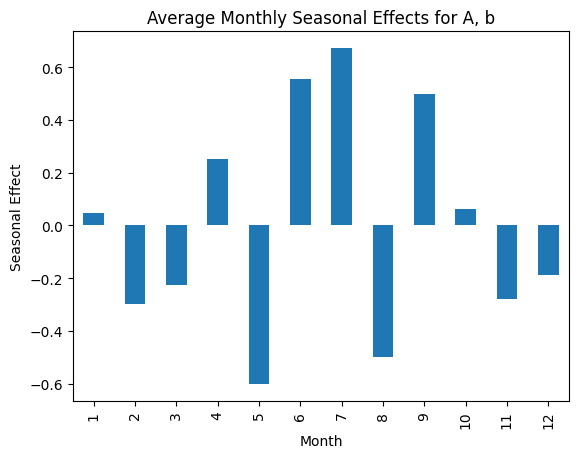

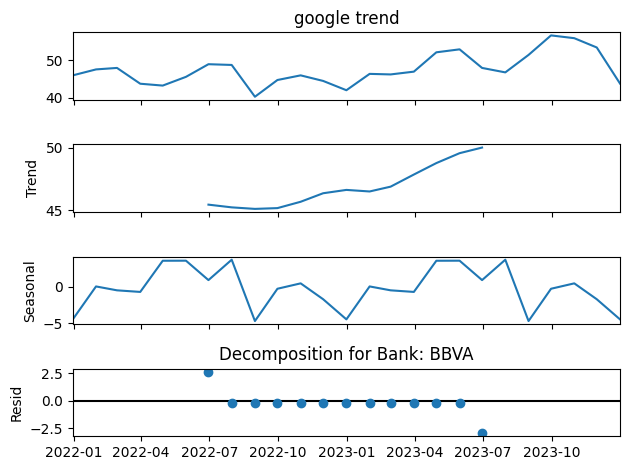

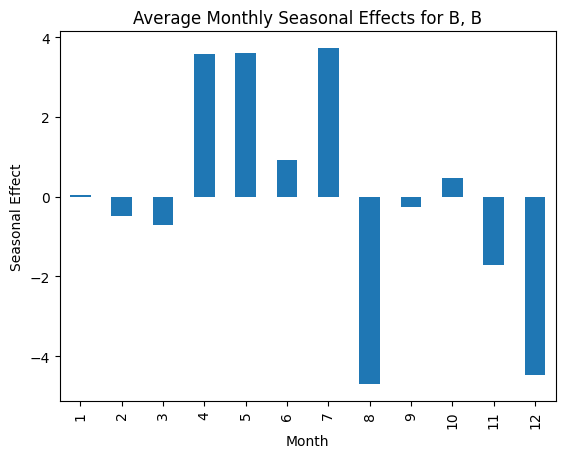

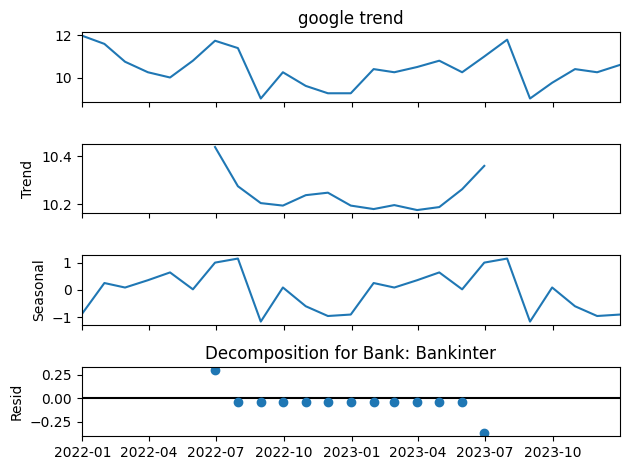

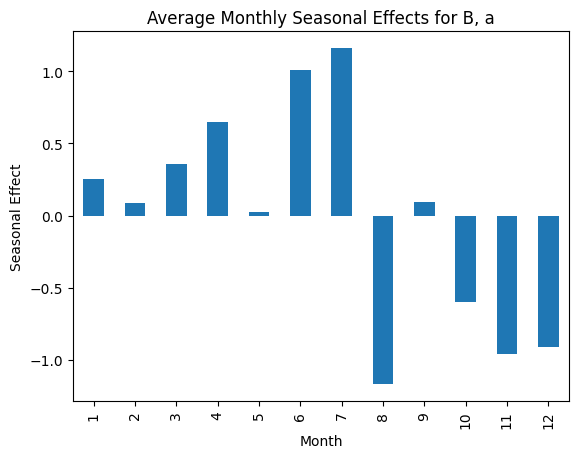

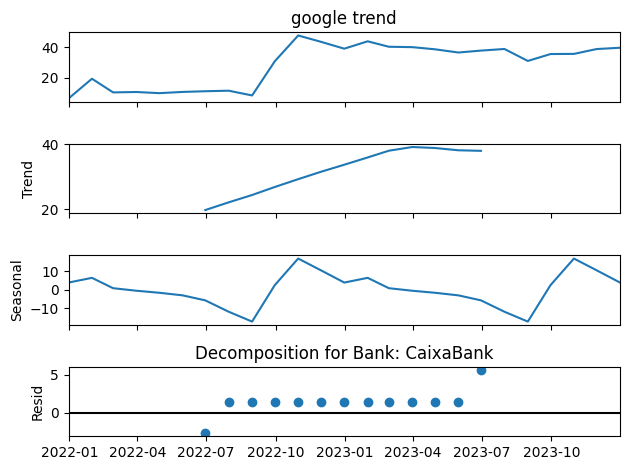

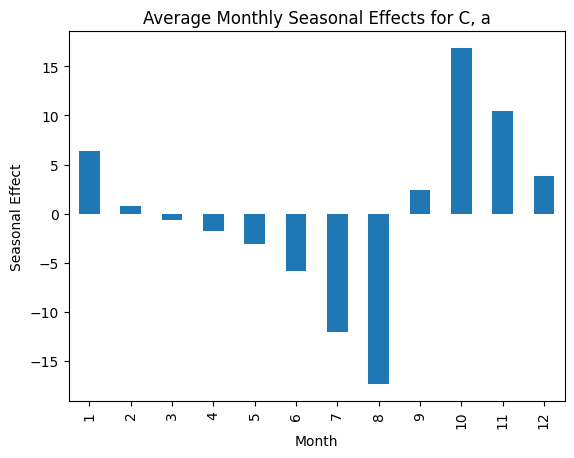

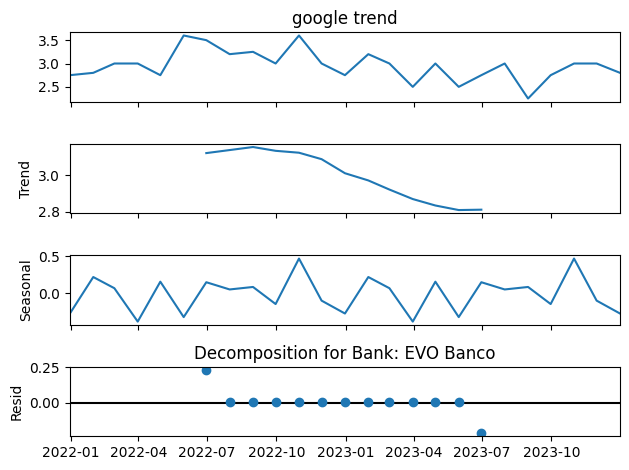

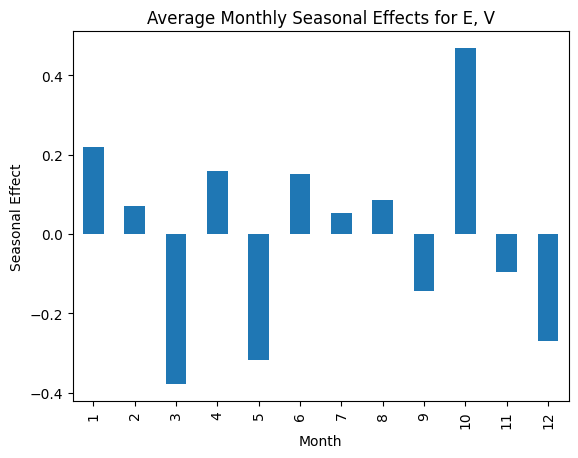

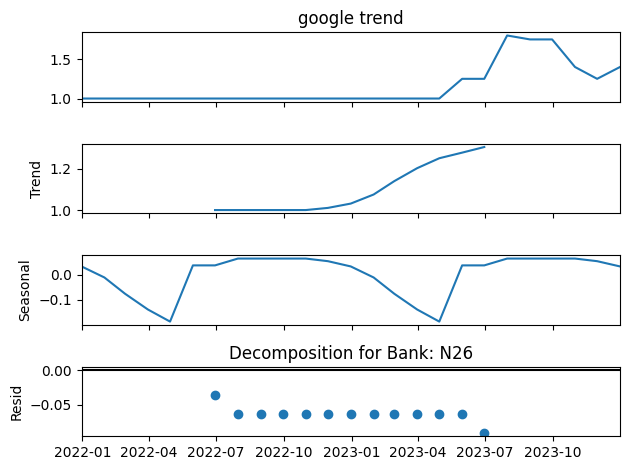

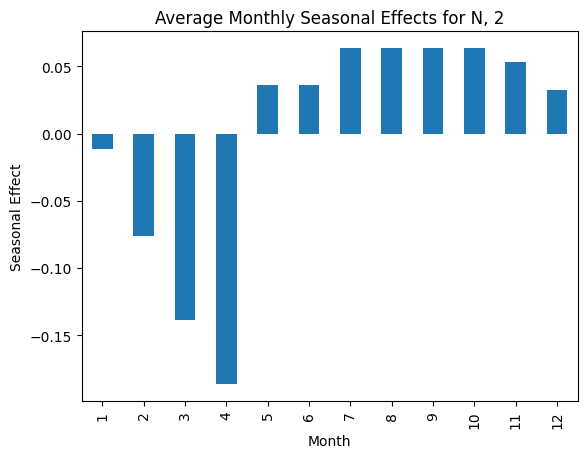

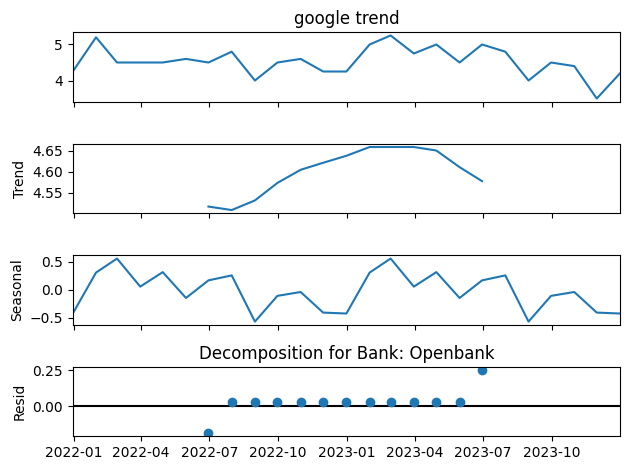

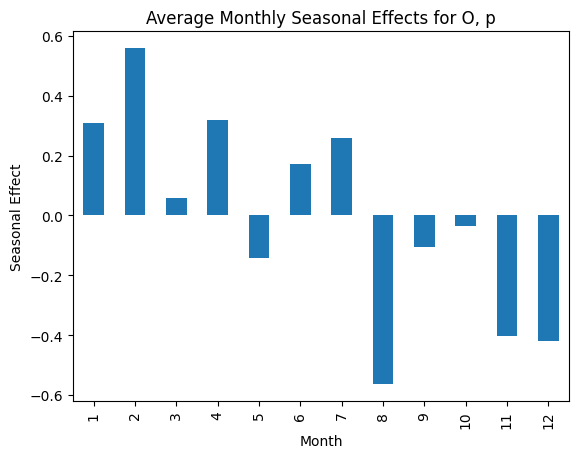

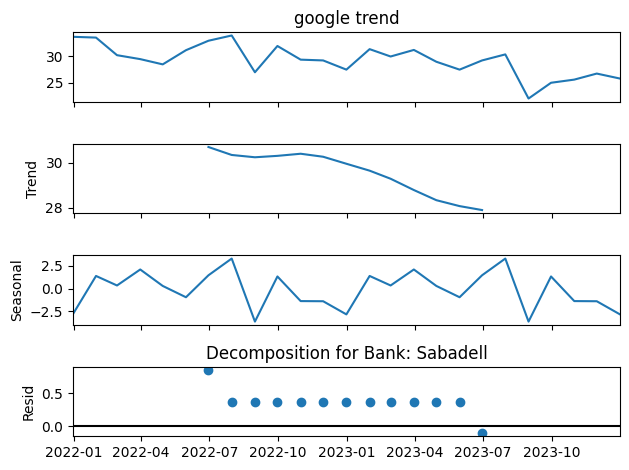

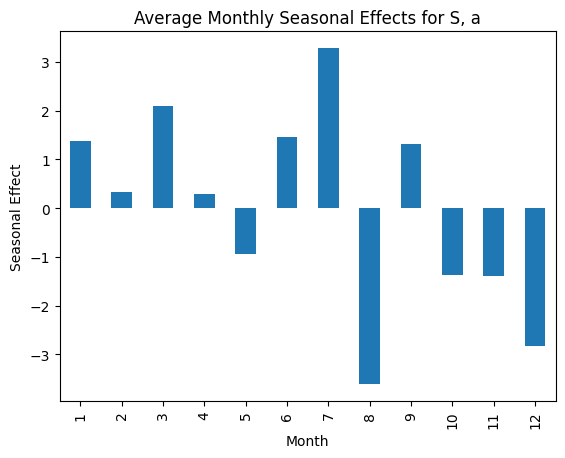

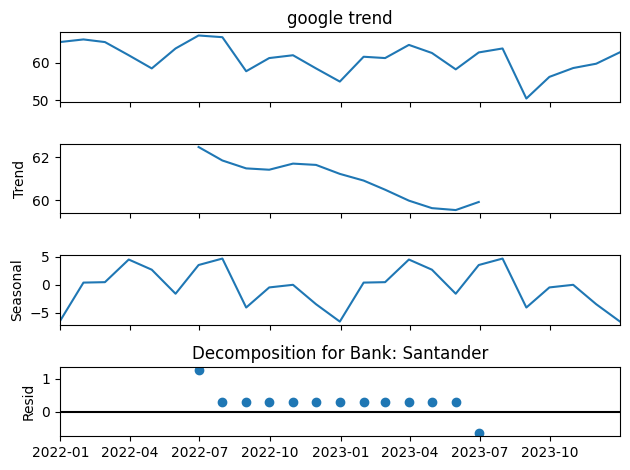

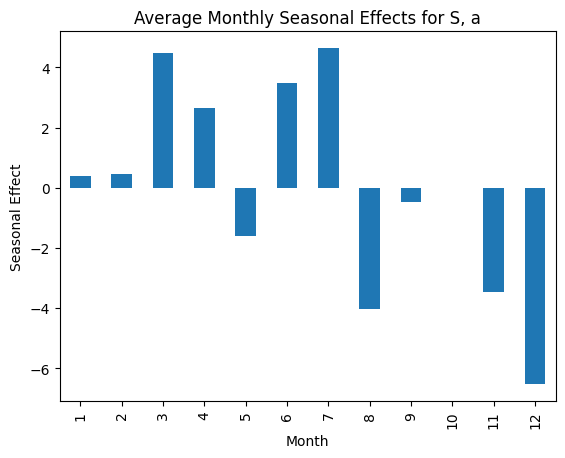

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_33340\4098118263.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_effects = long_monthly_google_df.groupby(['bank name']).apply(


In [38]:
seasonal_effects = long_monthly_google_df.groupby(['bank name']).apply(
    lambda group: decompose_and_analyze_seasonality(group, 'google trend', 'additive'))

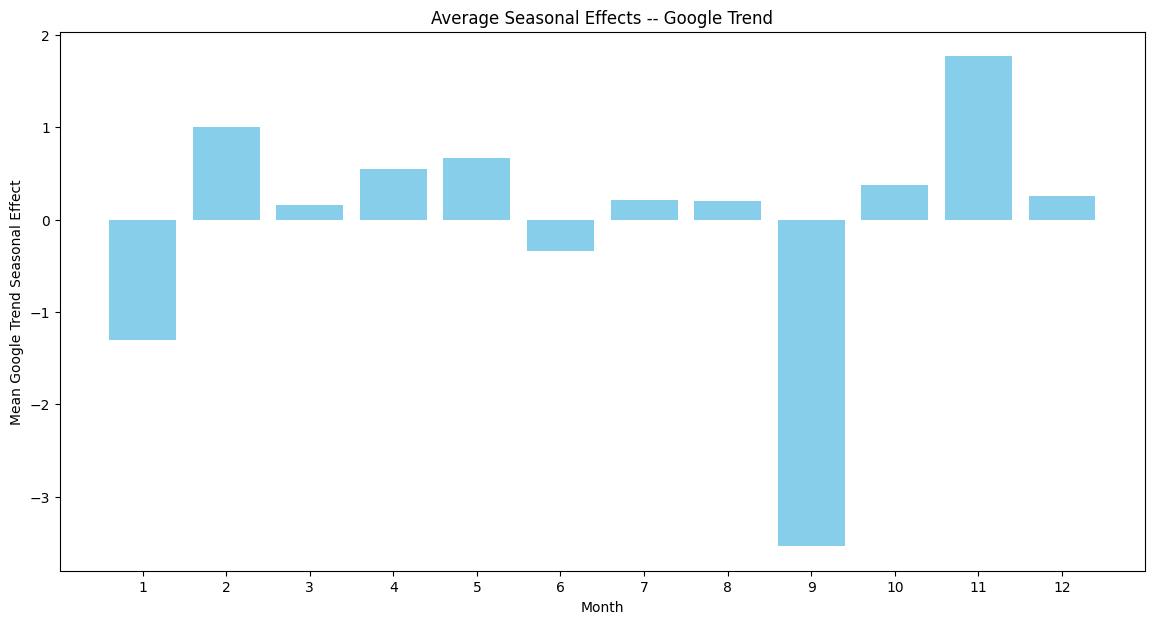

In [39]:
import matplotlib.pyplot as plt
import numpy as np

seasonal_effects = seasonal_effects.dropna()
monthly_mean_seasonal_effects = seasonal_effects.mean(axis=0)

# Limit to the first 12 months
monthly_mean_seasonal_effects = monthly_mean_seasonal_effects[:12]

# Plotting
plt.figure(figsize=(14, 7))  # Adjusting figure size for clarity
plt.bar(range(1, 13), monthly_mean_seasonal_effects.values, color='skyblue', width=0.8)

# Setting up the x-axis to show month numbers from 1 to 12
plt.xticks(np.arange(1, 13, step=1))

# Setting labels and title
plt.title('Average Seasonal Effects -- Google Trend')
plt.xlabel('Month')
plt.ylabel('Mean Google Trend Seasonal Effect')

# Show the plot
plt.show()
